# Introduction

The main function of this module is to convert recored peak intensities to particle sizes and create a [sizedistribution instance](./sizedistribution.ipynb).

# Imports

In [1]:
from atmPy.aerosols.instruments.POPS import peaks,calibration
import matplotlib.pylab as plt
from atmPy.tools import plt_tools
import numpy as np

In [2]:
%matplotlib inline
plt_tools.setRcParams(plt)

# Reading a Peak file

Different file formats emerged during the development of POPS, which resulted in different functions with various optional parameters to read the files. Hopefully you will only need to use the following one which emerged in fall 2015.

In [3]:
filename = './data/POPS_Peak.bin'
measurement = peaks.read_binary(filename)

# Sizing

To convert peak heights to particle sizes we first have to load a calibration file. Further information on calibration can be found [here](./instruments_POPS_calibration.ipynb).

In [4]:
cal = calibration.read_csv('./data/POPS_calibration.csv')

Then we apply this calibration which adds an extra column to the data set containg the particle size.

In [5]:
measurement.apply_calibration(cal)

	 25905 from 67386 peaks (38 %) are outside the calibration range (amplitude = [53.703179637, 31622.7766017], diameter = [130, 2500])
		 25904 too small
		 1 too big


# Convert to size distribution 

Either use use the default bins or define your own.

In [6]:
bins = np.logspace(np.log10(120), np.log10(3000), 100)
sd = measurement.peak2sizedistribution(bins = bins)

(<matplotlib.figure.Figure at 0x112451160>,
 <matplotlib.colorbar.Colorbar at 0x10851fa90>)

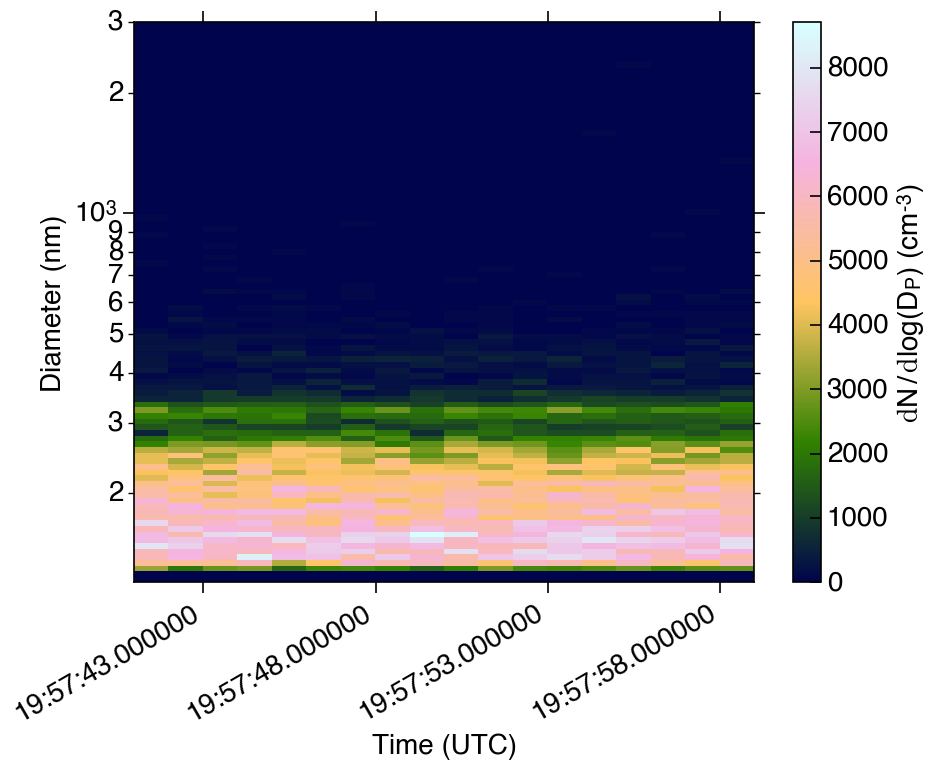

In [7]:
sd.plot()

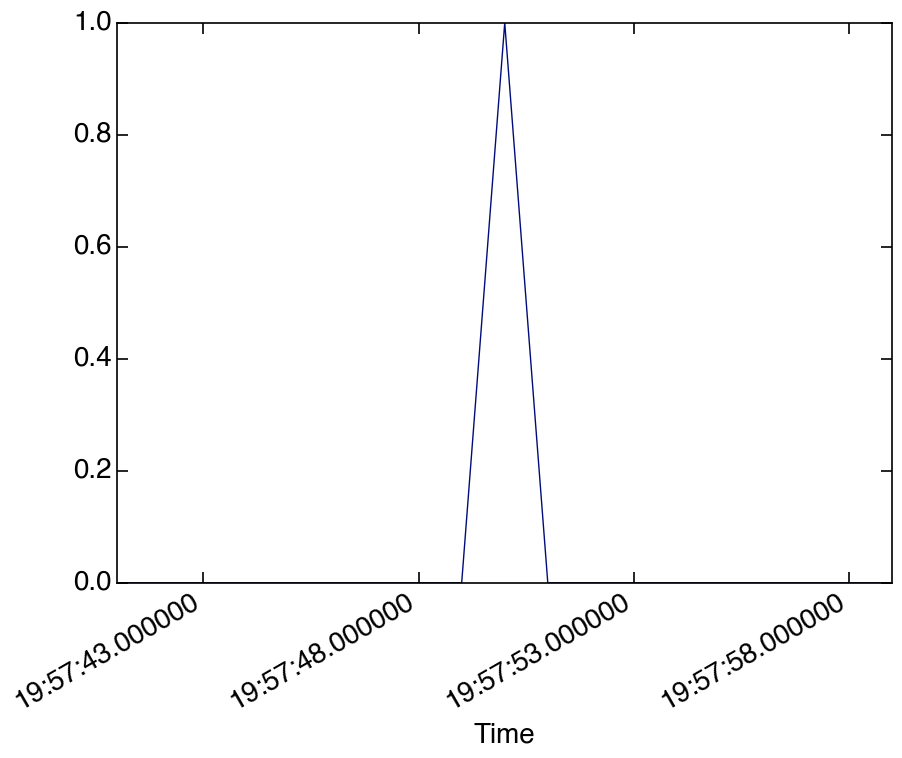

In [8]:
sd.particle_number_concentration_outside_range.plot()

# normalize to flow rate

You probably want to normalize the particle rates to particle concentrations by dividing by the flow rate. It is important not to apply operations solely to the data container. Instead perform the opperation on the entire sizedistribution instance. 

In [9]:
sd /= 3

(<matplotlib.figure.Figure at 0x117203978>,
 <matplotlib.colorbar.Colorbar at 0x10d6680b8>)

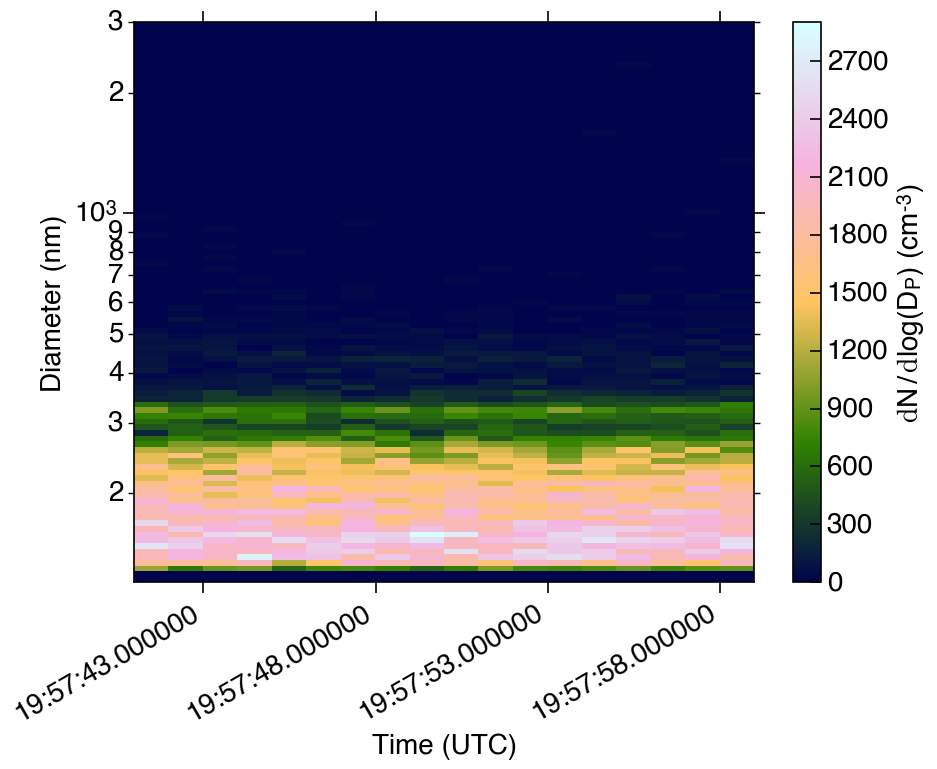

In [10]:
sd.plot()

In [11]:
sd.particle_number_concentration_outside_range

                     # too big
2015-10-09 19:57:41   0.000000
2015-10-09 19:57:42   0.000000
2015-10-09 19:57:43   0.000000
2015-10-09 19:57:44   0.000000
2015-10-09 19:57:45   0.000000
2015-10-09 19:57:46   0.000000
2015-10-09 19:57:47   0.000000
2015-10-09 19:57:48   0.000000
2015-10-09 19:57:49   0.000000
2015-10-09 19:57:50   0.333333
2015-10-09 19:57:51   0.000000
2015-10-09 19:57:52   0.000000
2015-10-09 19:57:53   0.000000
2015-10-09 19:57:54   0.000000
2015-10-09 19:57:55   0.000000
2015-10-09 19:57:56   0.000000
2015-10-09 19:57:57   0.000000
2015-10-09 19:57:58   0.000000
2015-10-09 19:57:59   0.000000

Done! Now you can do what ever you can do with a sizedistribution instance ([see here](./sizedistribution.ipynb)). E.g. save it, or plot it

In [9]:
sd.save_csv('./data/POPS_Peak.bin.dist')